# 📉 Telco Customer Churn Analysis – OutriX Internship Project

This project analyzes the Telco Customer Churn dataset to identify the key drivers behind customer churn in a telecommunications company. The goal is to uncover actionable insights that can help improve customer retention using Exploratory Data Analysis (EDA) techniques.

---

## 🔍 Objective

To explore churn behavior and reveal which factors influence whether a customer leaves the company. This analysis supports business decisions around retention strategy, service bundling, and customer segmentation.

---

## 🧰 Tools & Technologies

- Python
- Pandas & NumPy
- Matplotlib & Seaborn
- Jupyter Notebook


In [7]:
#  Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 2: Load the Dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

#  Step 3: Preview the Data
print(df.shape)
print(df.info())
df.head()


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#  Check for missing values
print("\nMissing values:\n", df.isnull().sum())

#  TotalCharges has some empty strings — convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#  Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

#  Reset index
df.reset_index(drop=True, inplace=True)

#  Convert 'SeniorCitizen' to Yes/No
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})



Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\ronak\AppData\Local\Temp\ipykernel_24588\55084987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


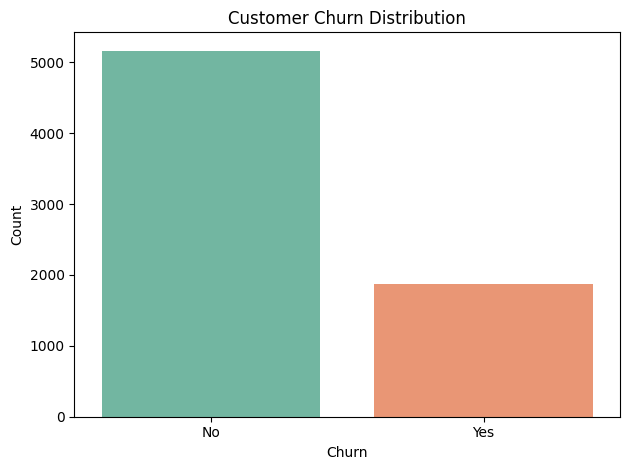

In [9]:
#  Churn Distribution
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../images/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


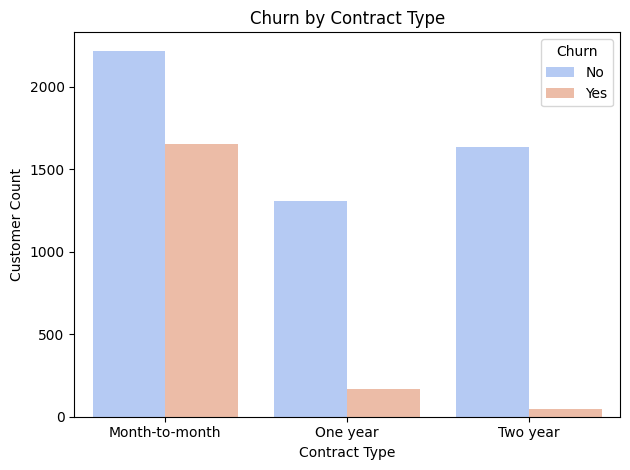

In [10]:
#  Churn Rate by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.savefig('../images/churn_by_contract.png', dpi=300, bbox_inches='tight')
plt.show()


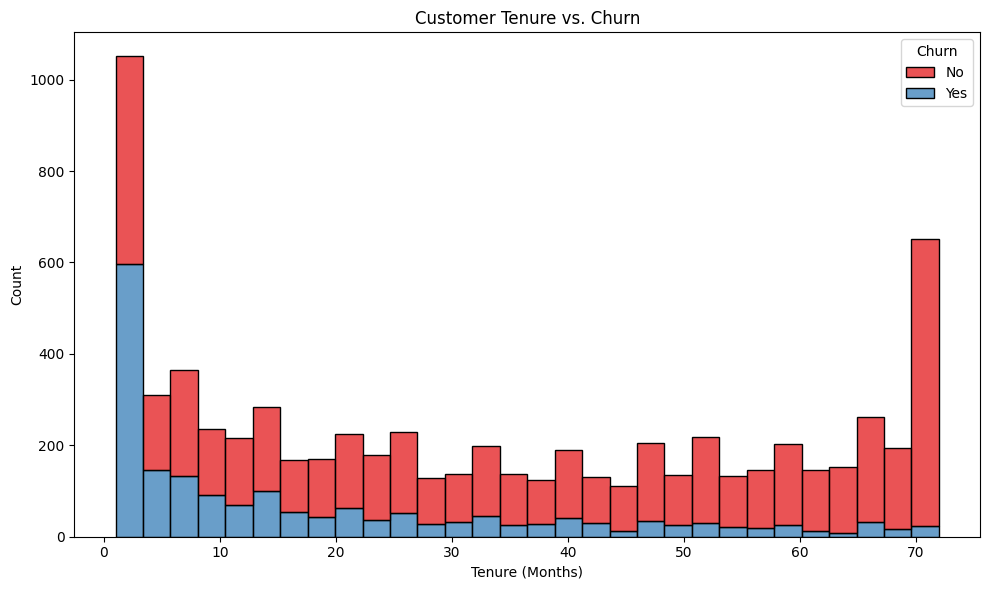

In [11]:
#  Tenure Distribution by Churn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='Set1', bins=30)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../images/tenure_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\ronak\AppData\Local\Temp\ipykernel_24588\3651981325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')


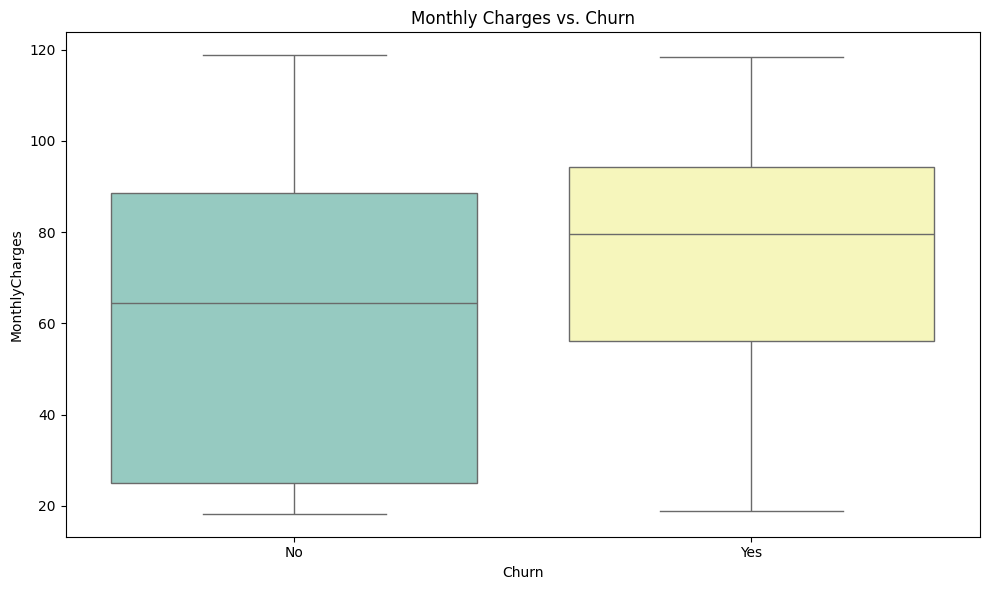

In [12]:
#  Monthly Charges vs. Churn
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges vs. Churn')
plt.tight_layout()
plt.savefig('../images/monthlycharges_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()


## 📊 Insight Summary – Customer Churn Analysis

This project explores customer behavior and churn patterns using the Telco Customer Churn dataset from Kaggle. The goal was to identify key drivers of churn and provide actionable business insights using Python-based visual analytics.

---

### ✅ Key Insights

### 1️⃣ Overall Churn Distribution
- Around **27% of customers** in the dataset have churned.
- This is a significant portion and indicates a need for focused retention strategies.

### 2️⃣ Contract Type and Churn
- Customers with **Month-to-Month contracts** are much more likely to churn than those on **One or Two-Year contracts**.
- 📌 **Actionable Insight:** Offering incentives for long-term contracts may improve retention.

### 3️⃣ Tenure and Churn
- Customers who have been with the company for **less than 12 months** are more prone to churn.
- 📌 **Actionable Insight:** Focus on improving onboarding and early customer experience.

### 4️⃣ Monthly Charges and Churn
- Customers who churn tend to have **higher monthly charges**.
- 📌 **Actionable Insight:** Consider introducing affordable plans or bundling services to reduce pricing sensitivity.

---